**How to Find Similar Users on the Basis of Ratings**


To understand the concept of similarity, let’s create a simple dataset first.

The data includes four users A, B, C, and D, who have rated two movies. The ratings are stored in lists, and each list contains two numbers indicating the rating of each movie:

Ratings by A are [1.0, 2.0].
Ratings by B are [2.0, 4.0].
Ratings by C are [2.5, 4.0].
Ratings by D are [4.5, 5.0].
To start off with a visual clue, plot the ratings of two movies given by the users on a graph and look for a pattern. The graph looks like this:

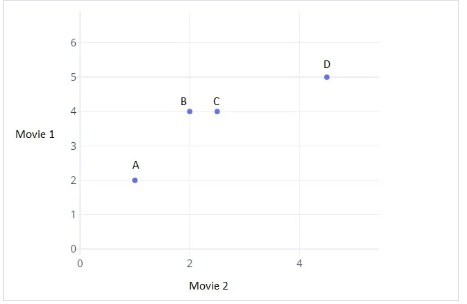

**Euclidean distance**

Looking at the distance between the points seems to be a good way to estimate similarity.find the distance using the formula for Euclidean distance between two points. use the function available in **scipy** as shown in the following program:



In [ ]:
import scipy.spatial as sp

a = [1, 2]
b = [2, 4]
c = [2.5, 4]
d = [4.5, 5]
sp.distance.euclidean(c, a)




2.5

In [ ]:
sp.distance.euclidean(c, b)

0.5

In [ ]:
sp.distance.euclidean(c, d)

2.23606797749979

**Cosine Similarity**

To calculate similarity using angle, you need a function that returns a higher similarity or smaller distance for a lower angle and a lower similarity or larger distance for a higher angle. The cosine of an angle is a function that decreases from 1 to -1 as the angle increases from 0 to 180.

You can consider that, if the angle between the lines is increased, then the similarity decreases, and if the angle is zero, then the users are very similar.

You can use the cosine of the angle to find the similarity between two users. The higher the angle, the lower will be the cosine and thus, the lower will be the similarity of the users. You can also inverse the value of the cosine of the angle to get the cosine distance between the users by subtracting it from 1.

scipy has a function that calculates the cosine distance of vectors. It returns a higher value for higher angle:

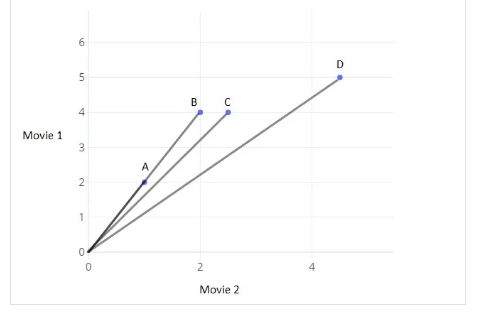

In [ ]:
import scipy.spatial as sp

a = [1, 2]
b = [2, 4]
c = [2.5, 4]
d = [4.5, 5]
sp.distance.cosine(c, a)




0.004504527406047898

In [ ]:
sp.distance.cosine(c, b)

0.004504527406047898

In [ ]:
sp.distance.cosine(c, d)

0.015137225946083022

In [ ]:
sp.distance.cosine(a,b)

**Pearson Correlation**


Correlation is a technique for investigating the relationship between two quantitative, continuous variables, for example, age and blood pressure. Pearson’s correlation coefficient is a measure related to the strength and direction of a linear relationship. We calculate this metric for the vectors x and y in the following way:

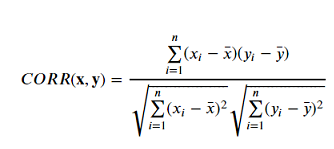

The Pearson’s correlation can take a range of values from -1 to +1. Only having an increase or decrease that are directly related will not lead to a Pearson’s correlation of 1 or -1.0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.


In [ ]:
import scipy.stats as sp

a = [1, 2]
b = [2, 4]
c = [2.5, 4]
d = [4.5, 5]
corr,ab=sp.pearsonr(a, b)
print(corr)


1.0


In [ ]:
corr,ab=sp.pearsonr(b, c)
print(corr)

In [ ]:
corr,ab=sp.pearsonr(c, d)
print(corr)

In [ ]:
corr,ab=sp.pearsonr(a, d)
print(corr)

**How to Calculate the Ratings**

After you have determined a list of users similar to a user U, you need to calculate the rating R that U would give to a certain item I. Again, just like similarity, you can do this in multiple ways.

You can predict that a user’s rating R for an item I will be close to the average of the ratings given to I by the top 5 or top 10 users most similar to U. The mathematical formula for the **average rating **given by n users would look like this:

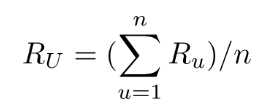


There will be situations where the n similar users that you found are not equally similar to the target user U. The top 3 of them might be very similar, and the rest might not be as similar to U as the top 3. In that case, you could consider an approach where the rating of the most similar user matters more than the second most similar user and so on. The **weighted average **can help us achieve that.

In the weighted average approach, you multiply each rating by a similarity factor(which tells how similar the users are). By multiplying with the similarity factor, you add weights to the ratings. The heavier the weight, the more the rating would matter.

**Model Based Approach**


The second category covers the Model based approaches, which involve a step to reduce or compress the large but sparse user-item matrix. For understanding this step, a basic understanding of dimensionality reduction can be very helpful.

**Dimensionality Reduction**

In the user-item matrix, there are two dimensions:


*   The number of users
*   The number of items

If the matrix is mostly empty, reducing dimensions can improve the performance of the algorithm in terms of both space and time. You can use various methods like matrix factorization or autoencoders to do this.

**Understanding Recommendation system using surprise(Python scikit)**



In [ ]:
!pip uninstall -y scipy
!pip install scipy==1.0.0
!pip install scikit-surprise

Uninstalling scipy-1.4.1:
  Successfully uninstalled scipy-1.4.1
     |████████████████████████████████| 15.2MB 1.8MB/s 
  ERROR: Failed building wheel for scipy
  Running setup.py clean for scipy
  ERROR: Failed cleaning build dir for scipy
Failed to build scipy
ERROR: pymc3 3.11.2 has requirement scipy>=1.2.0, but you'll have scipy 1.0.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.0.0 which is incompatible.
ERROR: cvxpy 1.0.31 has requirement scipy>=1.1.0, but you'll have scipy 1.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
    Running setup.py install for scipy ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-ta87awpo/scipy/setup.py'"'"'; __file__='"'"'/tmp/pip-install-ta87awpo/scipy/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'

In [ ]:


import pandas as pd

from surprise import Dataset
from surprise import Reader

# This is the same data that was plotted for similarity earlier
# with one new user "E" who has rated only movie 1
ratings_dict = {
    "item": [1, 2, 1, 2, 1, 2, 1, 2, 1],
    "user": ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D', 'E'],
    "rating": [1, 2, 2, 4, 2.5, 4, 4.5, 5, 3],
}

df = pd.DataFrame(ratings_dict)
reader = Reader(rating_scale=(1, 5))

# Loads Pandas dataframe
data = Dataset.load_from_df(df[["user", "item", "rating"]], reader)
# Loads the builtin Movielens-100k data
movielens = Dataset.load_builtin('ml-100k')


Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


**Algorithms Based on K-Nearest Neighbours (k-NN)**

In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:


from surprise import KNNWithMeans

# To use item-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}
algo = KNNWithMeans(sim_options=sim_options)




In [ ]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(movielens, test_size=.25)
algo.fit(trainset)
prediction = algo.predict('E', 2)
prediction.est

Computing the cosine similarity matrix...
Done computing similarity matrix.


3.5348